# Predicting the Price of Used Hero Pleasure Motor Bike in Sri Lanka

In this Project, we are going to predict the Price of Sri Lankan Used Hero Plesure Bike using various features like Brand, Price, Mileage, Year etc. The data is obtained using web scraping reputed vehecle reselling site called Riyasewana.

**To be able to predict used Honda Dio Bike market value can help both buyers and sellers.**

There are lots of individuals who are interested in Used Hero Plesure used Motor Bike market at some points in their life because they wanted to sell their motor bike or buy a used motor bike. In this process, it’s a big corner to pay too much or sell less then it’s market value.

# Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Loading the raw data

In [65]:
pleasure=pd.read_excel("pleasure.xlsx")
pleasure.head()

,Title,Link,Location,Price,Mileage,Date
0,Hero Pleasure 2015 Motorbike,https://riyasewana.com/buy/hero-pleasure-sale-...,Padukka,"Rs. 170,000",20240125,2024-01-25
1,Hero Pleasure 2017 Motorbike,https://riyasewana.com/buy/hero-pleasure-sale-...,Anuradapura,"Rs. 335,000",1,2024-01-25
2,Hero Pleasure 2015 Motorbike,https://riyasewana.com/buy/hero-pleasure-sale-...,Anuradapura,"Rs. 275,000",1,2024-01-25
3,Hero Pleasure 2008 Motorbike,https://riyasewana.com/buy/hero-pleasure-sale-...,Dambulla,"Rs. 170,000",20240125,2024-01-25
4,Hero Pleasure 2009 Motorbike,https://riyasewana.com/buy/hero-pleasure-sale-...,Eheliyagoda,"Rs. 185,000",20240125,2024-01-25


### Drop unwanted column

In [66]:
pleasure.drop("Link",axis=1,inplace=True)

### Number of rows and columns in data frame

In [67]:
pleasure.shape

(559, 5)

### Check the count of duplicated rows

In [68]:
pleasure.duplicated().sum()

6

### Deleting duplicated rows and check the task completed successfully

In [69]:
pleasure.drop_duplicates(inplace=True)
pleasure.duplicated().sum()

0

### Check missing values included rows in data frame

In [70]:
pleasure.isnull().sum()

Title       0
Location    0
Price       0
Mileage     0
Date        0
dtype: int64

### Get Summarized Information of the data frame

In [71]:
pleasure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 558
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     553 non-null    object
 1   Location  553 non-null    object
 2   Price     553 non-null    object
 3   Mileage   553 non-null    int64 
 4   Date      553 non-null    object
dtypes: int64(1), object(4)
memory usage: 25.9+ KB


### Get Only Published Year from Date and store it as Published_Year

In [72]:
pleasure["Published_Year"]=pd.to_datetime(pleasure["Date"]).dt.year

### Get Model, Brand and Year of manufatured from Title

In [73]:
pleasure["Model"]=pleasure["Title"].str.split().str[0]
pleasure["Brand"]=pleasure["Title"].str.split().str[1]
pleasure["Year"]=pleasure["Title"].str.split().str[2]

pleasure.drop(["Title","Date"],axis=1,inplace=True)  # drop Title and Date column permanatly

### Get Number of unique value of every variables

In [74]:
pleasure.nunique()

Location           70
Price             113
Mileage           294
Published_Year      2
Model               1
Brand               2
Year               15
dtype: int64

### Get the data types of every varible

In [75]:
pleasure.dtypes

Location          object
Price             object
Mileage            int64
Published_Year     int64
Model             object
Brand             object
Year              object
dtype: object

### Get First 5 rows of  the data frame

In [76]:
pleasure.head()

,Location,Price,Mileage,Published_Year,Model,Brand,Year
0,Padukka,"Rs. 170,000",20240125,2024,Hero,Pleasure,2015
1,Anuradapura,"Rs. 335,000",1,2024,Hero,Pleasure,2017
2,Anuradapura,"Rs. 275,000",1,2024,Hero,Pleasure,2015
3,Dambulla,"Rs. 170,000",20240125,2024,Hero,Pleasure,2008
4,Eheliyagoda,"Rs. 185,000",20240125,2024,Hero,Pleasure,2009


### Get Unique values of Year variable

In [77]:
pleasure["Year"].unique()

array(['2015', '2017', '2008', '2009', '2010', '2011', '2013', '2012',
       '2019', '2016', '2014', '2018', '2020', '2007', '2006'],
      dtype=object)

### Convert Price into intiger format and convert it as Lacs

In [78]:
pleasure['Price'] = pleasure['Price'].str.replace('[^\d]', '', regex=True)
# Convert the column to numeric type
pleasure['Price'] = pd.to_numeric(pleasure['Price'])
pleasure['Price'] = pleasure['Price']/1e5
pleasure.head()

,Location,Price,Mileage,Published_Year,Model,Brand,Year
0,Padukka,1.70,20240125,2024,Hero,Pleasure,2015
1,Anuradapura,3.35,1,2024,Hero,Pleasure,2017
2,Anuradapura,2.75,1,2024,Hero,Pleasure,2015
3,Dambulla,1.70,20240125,2024,Hero,Pleasure,2008
4,Eheliyagoda,1.85,20240125,2024,Hero,Pleasure,2009


### Checking Price data type converted was successfully

In [79]:
pleasure["Price"].dtype

dtype('float64')

In [80]:
pleasure.nunique()

Location           70
Price             112
Mileage           294
Published_Year      2
Model               1
Brand               2
Year               15
dtype: int64

### Converting Year data types as Integer

In [81]:

pleasure["Year"]=pleasure["Year"].astype(int)

### Checking Brand Unique values 

In [82]:
pleasure["Brand"].unique()

array(['Pleasure', 'PLEASURE'], dtype=object)

In [83]:

pleasure["Brand"].replace({'PLEASURE': 'Pleasure'}, inplace=True)
pleasure["Brand"].nunique()

1

### Checking Location Unique values 

In [84]:
pleasure["Location"].unique()

array(['Padukka', 'Anuradapura', 'Dambulla', 'Eheliyagoda', 'Nittambuwa',
       'Gampaha', 'Kurunegala', 'Matugama', 'Colombo', 'Katunayake',
       'Kuliyapitiya', 'Puttalam', 'Hambantota', 'Ja-Ela', 'Piliyandala',
       'Galle', 'Negombo', 'Kottawa', 'Divulapitiya', 'Malabe',
       'Homagama', 'Tangalle', 'Pannipitiya', 'Ambalangoda',
       'Minuwangoda', 'Mawanella', 'Matara', 'Kalutara', 'Kandy',
       'Wennappuwa', 'Polonnaruwa', 'Horana', 'Ratnapura', 'Kolonnawa',
       'Matale', 'Moneragala', 'Maharagama', 'Polgahawela', 'Bandaragama',
       'Gampola', 'Ragama', 'Mirigama', 'Nawalapitiya', 'Pannala',
       'Kegalle', 'Chilaw', 'Mahiyanganaya', 'Panadura', 'Kadawatha',
       'Elpitiya', 'Bandarawela', 'Kaduwela', 'Weligama', 'Welimada',
       'Embilipitiya', 'Dompe', 'Moratuwa', 'Hanwella',
       'Dehiwala-Mount-Lavinia', 'Boralesgamuwa', 'Dankotuwa', 'Beruwala',
       'Avissawella', 'Battaramulla', 'Kiribathgoda', 'Kelaniya',
       'Balangoda', 'Veyangoda', 'Nuwara-

In [85]:
pleasure.head()

,Location,Price,Mileage,Published_Year,Model,Brand,Year
0,Padukka,1.70,20240125,2024,Hero,Pleasure,2015
1,Anuradapura,3.35,1,2024,Hero,Pleasure,2017
2,Anuradapura,2.75,1,2024,Hero,Pleasure,2015
3,Dambulla,1.70,20240125,2024,Hero,Pleasure,2008
4,Eheliyagoda,1.85,20240125,2024,Hero,Pleasure,2009


In [86]:
pleasure.nunique()

Location           70
Price             112
Mileage           294
Published_Year      2
Model               1
Brand               1
Year               15
dtype: int64

### Get statistical summrized details of dataframe (dio1)

In [87]:
pleasure.describe()

,Price,Mileage,Published_Year,Year
count,467.000000,5.530000e+02,553.000000,553.000000
mean,2.561263,3.146291e+06,2023.491863,2013.468354
std,0.729482,7.289904e+06,0.500386,2.726579
min,1.220000,1.000000e+00,2023.000000,2006.000000
25%,2.050000,2.590000e+04,2023.000000,2011.000000
50%,2.480000,3.800000e+04,2023.000000,2014.000000
75%,3.000000,5.930000e+04,2024.000000,2015.000000
max,9.500000,2.024012e+07,2024.000000,2020.000000


# Price

### Remove more than 7 lacs data ; Bracuse in market it can't be happend

In [88]:
pleasure1=pleasure[pleasure["Price"]<7]

### Get Distribution plot of Price 

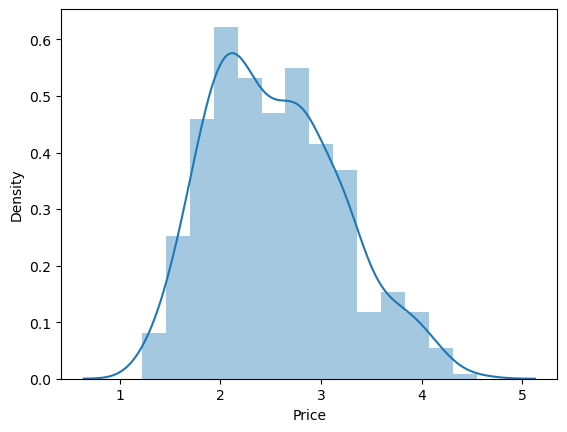

In [89]:
sns.distplot(pleasure1["Price"])
plt.show()

### Get Barplot identify outliers of Price

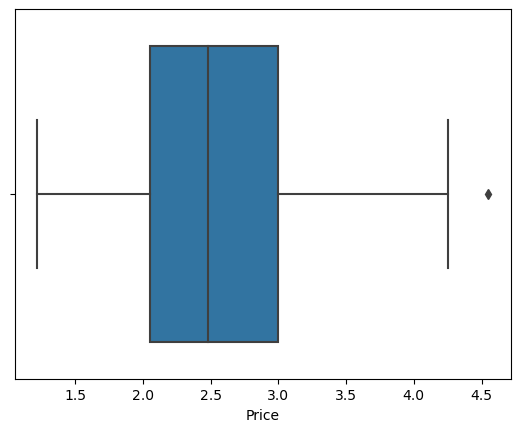

In [90]:
sns.boxplot(pleasure1["Price"])
plt.show()

In [91]:
Q1 = pleasure1['Price'].quantile(0.25)
Q3 = pleasure1['Price'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 :-",Q1)
print("Q3 :-",Q3)
print("IQR :-",IQR)

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound is:-",lower_bound)
print("Upper Bound is:-",upper_bound)

Q1 :- 2.05
Q3 :- 2.9975
IQR :- 0.9475000000000002
Lower Bound is:- 0.6287499999999995
Upper Bound is:- 4.41875


### Getting Average price of every Year

In [92]:
price_year=pleasure1.groupby(["Year"])["Price"].mean()
price_year

Year
2006    2.000000
2007    1.626667
2008    1.628182
2009    1.730000
2010    1.922821
2011    2.026901
2012    2.201176
2013    2.384348
2014    2.710441
2015    2.962159
2016    3.056552
2017    3.422857
2018    3.601111
2019    3.424286
2020    1.420000
Name: Price, dtype: float64

### Getting Boxplot Year vs Price :- To identify outliers

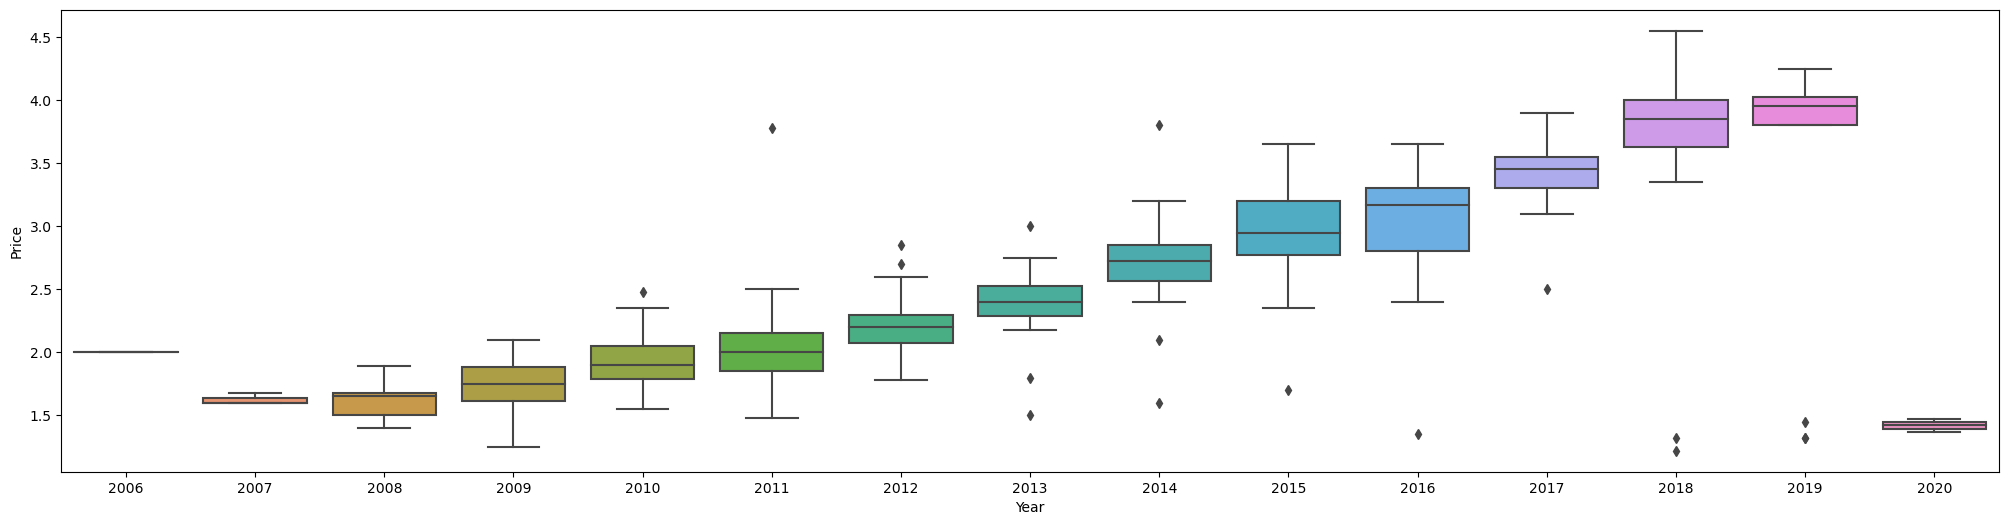

In [93]:
plt.figure(figsize=(25,6))
sns.boxplot(x="Year",y="Price",data=pleasure1)
plt.show()

### Here year 2006 

In [94]:
pleasure1=pleasure1[~pleasure1["Year"].isin([2006,2020])]

### Removing outliers 

In [95]:
pleasure2 = pleasure1[
    ~((pleasure1["Year"] == 2011) & (pleasure1["Price"] > 3)) &
    ~((pleasure1["Year"] == 2013) & (pleasure1["Price"] < 2)) &
    ~((pleasure1["Year"] == 2014) & (pleasure1["Price"] > 3.5)) &
    ~((pleasure1["Year"] == 2014) & (pleasure1["Price"] < 2.3)) &
    ~((pleasure1["Year"] == 2015) & (pleasure1["Price"] < 2)) &
    ~((pleasure1["Year"] == 2016) & (pleasure1["Price"] < 2)) &
    ~((pleasure1["Year"] == 2017) & (pleasure1["Price"] < 2.8)) &
    ~((pleasure1["Year"] == 2018) & (pleasure1["Price"] < 3)) &
    ~((pleasure1["Year"] == 2019) & (pleasure1["Price"] < 3))
]


In [96]:
pleasure2.head()

,Location,Price,Mileage,Published_Year,Model,Brand,Year
1,Anuradapura,3.35,1,2024,Hero,Pleasure,2017
2,Anuradapura,2.75,1,2024,Hero,Pleasure,2015
3,Dambulla,1.70,20240125,2024,Hero,Pleasure,2008
4,Eheliyagoda,1.85,20240125,2024,Hero,Pleasure,2009
5,Nittambuwa,2.90,37856,2024,Hero,Pleasure,2015


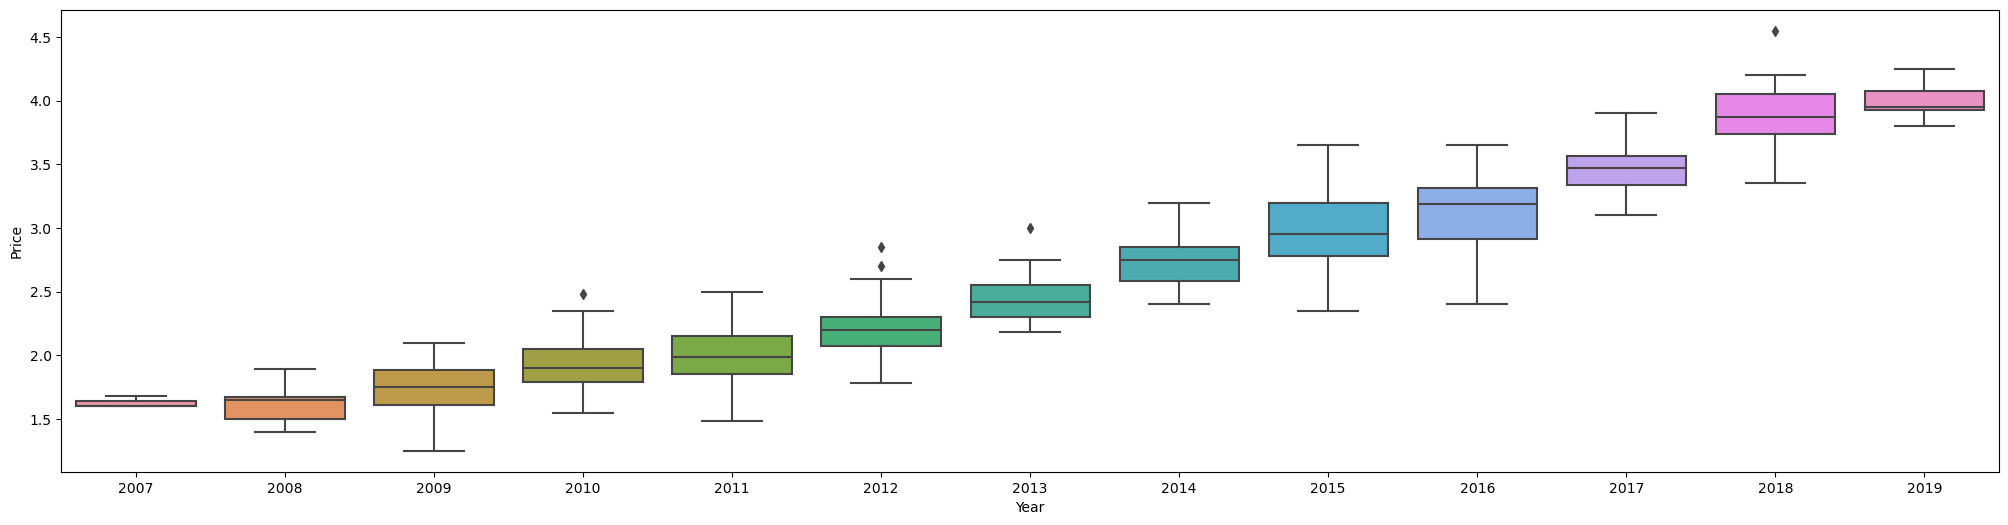

In [97]:
plt.figure(figsize=(25,6))
sns.boxplot(x="Year",y="Price",data=pleasure2)
plt.show()

In [98]:
pleasure2[pleasure2["Price"]<2]

,Location,Price,Mileage,Published_Year,Model,Brand,Year
3,Dambulla,1.70,20240125,2024,Hero,Pleasure,2008
4,Eheliyagoda,1.85,20240125,2024,Hero,Pleasure,2009
12,Kuliyapitiya,1.85,64302,2024,Hero,Pleasure,2010
13,Puttalam,1.90,20240125,2024,Hero,Pleasure,2010
14,Kurunegala,1.95,20240125,2024,Hero,Pleasure,2011
...,...,...,...,...,...,...,...
543,Kurunegala,1.90,65000,2023,Hero,Pleasure,2012
549,Chilaw,1.78,14362,2023,Hero,Pleasure,2010
553,Divulapitiya,1.72,1234,2023,Hero,Pleasure,2011
555,Matara,1.55,64300,2023,Hero,Pleasure,2011


# Mileage

### Normally Sccoty milage are below 1e5 in selling market

In [99]:
pleasure3=pleasure2[pleasure2["Mileage"]<1e5]

In [100]:
pleasure3.describe()

,Price,Mileage,Published_Year,Year
count,364.000000,364.000000,364.000000,364.000000
mean,2.616071,35724.983516,2023.483516,2013.450549
std,0.648374,17054.760665,0.500416,2.605414
min,1.250000,1.000000,2023.000000,2007.000000
25%,2.100000,25000.000000,2023.000000,2011.000000
50%,2.600000,35000.000000,2023.000000,2014.000000
75%,3.100000,47012.500000,2024.000000,2015.000000
max,4.550000,88000.000000,2024.000000,2019.000000


<AxesSubplot:xlabel='Mileage'>

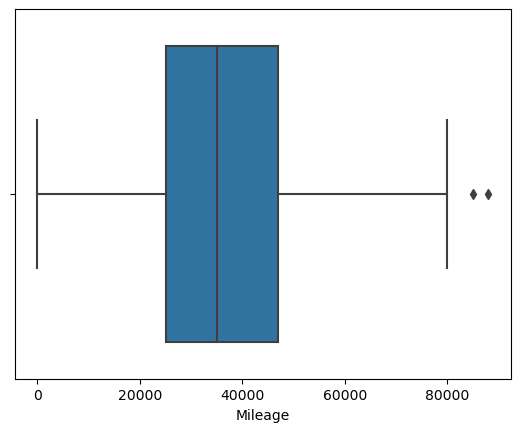

In [101]:
sns.boxplot(pleasure3["Mileage"])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

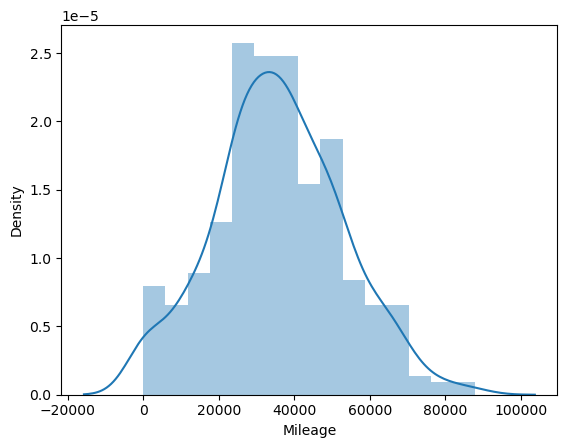

In [102]:
sns.distplot(pleasure3["Mileage"])

In [103]:
corr=pleasure3.corr()

<AxesSubplot:>

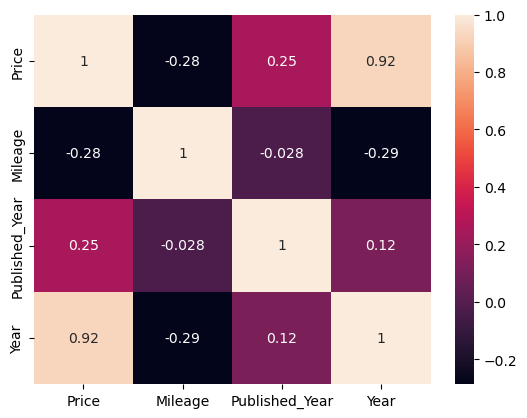

In [104]:
sns.heatmap(pleasure3.corr(),annot=True)

In [105]:
pleasure3.describe(include="object")

,Location,Model,Brand
count,364,364,364
unique,62,1,1
top,Kurunegala,Hero,Pleasure
freq,32,364,364


In [106]:
y = pleasure3['Price']
X = pleasure3[["Mileage","Published_Year","Year"]]

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (291, 3)
x test:  (73, 3)
y train:  (291,)
y test:  (73,)


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=149)
    
# Initialize and train your linear regression model

model = LinearRegression()
model.fit(X_train, y_train)
    
    # Make predictions
y_pred = model.predict(X_test)
    
    # Calculate R-squared
r2 = r2_score(y_test, y_pred)
    


print("R-squared:", r2)

R-squared: 0.8909194479815055


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Assuming X and y are your features and target variable

best_r2 = -1  # Initialize the best R-squared score to a value lower than any possible R-squared score
best_random_state = None

for random_state in range(100):  # You can adjust the range based on your preferences
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_random_state = random_state

# Train the model with the best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Best Random State:", best_random_state)
print("Best R-squared:", r2)


Best Random State: 55
Best R-squared: 0.9112531552539453


In [110]:
pickle.dump(model,open("model.pkl","wb"))

In [111]:
model=pickle.load(open("model.pkl","rb"))

In [112]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [113]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.86
Test R2-score : 0.91
Train CV scores : [0.83370572 0.89708625 0.89941795 0.87292073 0.7995809 ]
Train CV mean : 0.86


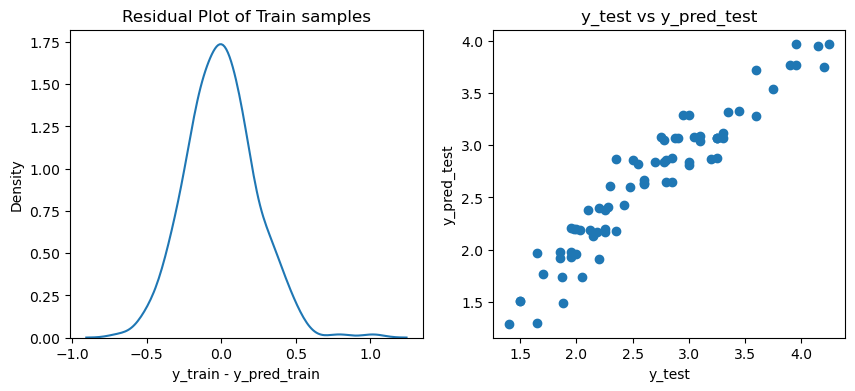

In [114]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.86
Test R2-score : 0.91
Train CV scores : [0.83370603 0.89708995 0.89941551 0.8729206  0.79958097]
Train CV mean : 0.86


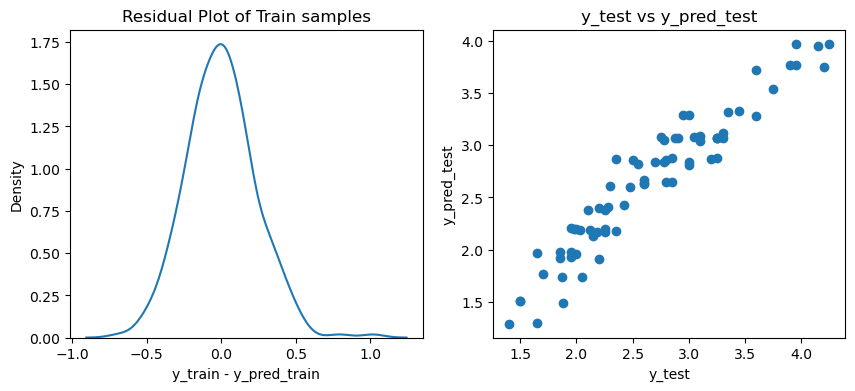

In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Train R2-score : 0.86
Test R2-score : 0.91
Train CV scores : [0.83403064 0.89719372 0.89826011 0.87275671 0.7996553 ]
Train CV mean : 0.86


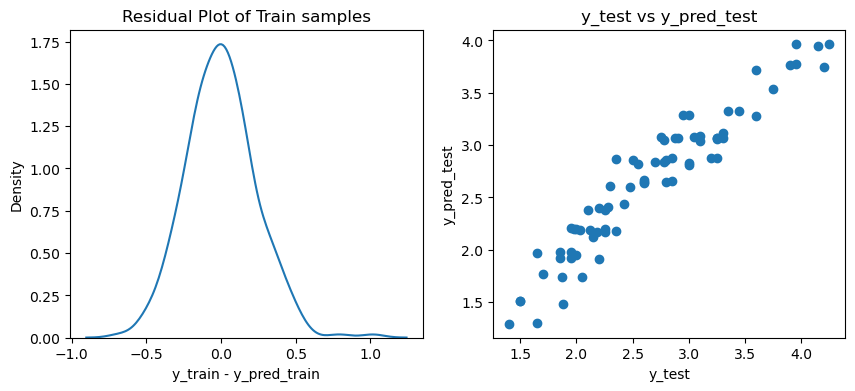

In [116]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

In [117]:
pleasure3.to_csv("Clean1.csv", index=False)